In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
df = pd.read_csv("FuelConsumptionCo2.csv")

In [6]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
cdf = df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]

In [8]:
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [9]:
msk = np.random.rand(len(df)) < 0.8

In [10]:
train = cdf[msk]

In [11]:
test= cdf[~msk]

In [12]:
from sklearn.linear_model import LinearRegression 

In [13]:
from sklearn.preprocessing import PolynomialFeatures 

In [14]:
x_train = np.asanyarray(train[["ENGINESIZE"]])

In [15]:
y_train = np.asanyarray(train[["CO2EMISSIONS"]])

In [16]:
x_test = np.asanyarray(test[["ENGINESIZE"]])

In [17]:
y_test = np.asanyarray(test[["CO2EMISSIONS"]])

In [18]:
poly = PolynomialFeatures(degree=2)

In [19]:
x_train_poly= poly.fit_transform(x_train)

In [20]:
x_train_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24]])

In [21]:
reg = LinearRegression()

In [22]:
reg.fit(x_train_poly, y_train)

LinearRegression()

In [23]:
reg.coef_

array([[ 0.        , 52.47662082, -1.80191018]])

In [24]:
reg.intercept_

array([105.12677872])

Text(0, 0.5, 'Emission')

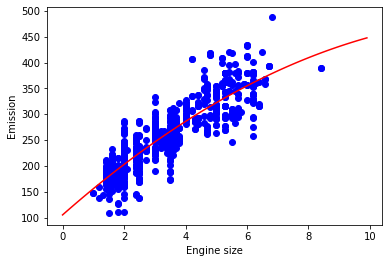

In [25]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = reg.intercept_[0]+ reg.coef_[0][1]*XX+ reg.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [26]:
from sklearn.metrics import r2_score

In [27]:
x_test_poly = poly.transform(x_test)

In [28]:
y_hat = reg.predict(x_test_poly)

In [29]:
print(r2_score(y_test,y_hat))

0.7837938333511724


In [30]:
print("mean absolute error", np.mean(np.absolute(y_hat-y_test)))

mean absolute error 20.996198782662287


In [31]:
print("mean squarred error", np.mean((y_hat-y_test)**2))

mean squarred error 759.6315511619752
